<a href="https://colab.research.google.com/github/Chitswaz/CO2-emmission-linear-regression/blob/main/co2_polynomial_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# downloading the dataset
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-01-11 07:10:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2024-01-11 07:10:36 (1.37 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
# make the dataset an object
df = pd.read_csv("FuelConsumption.csv")
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


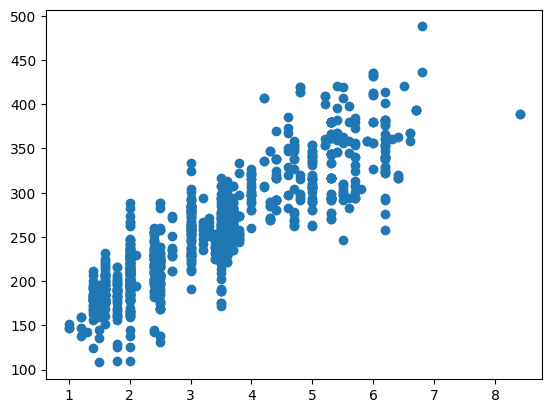

In [5]:
#visualizing the dataplots
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
plt.show()

In [6]:
# splitting the data into training and test set
mask = np.random.rand(len(cdf)) < 0.8
training = cdf[mask]
testing = cdf[~mask]


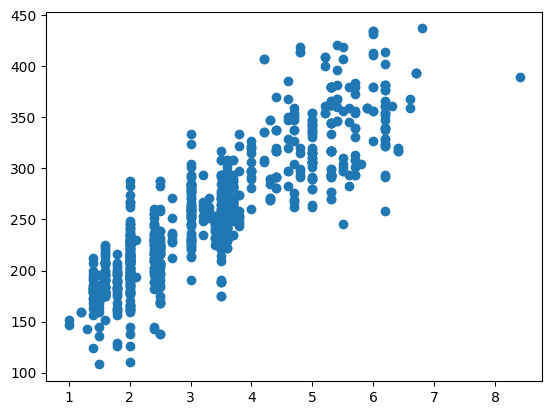

In [7]:
# visualize the training set that was chosen by randomnes
plt.scatter(training.ENGINESIZE, training.CO2EMISSIONS)
plt.show()

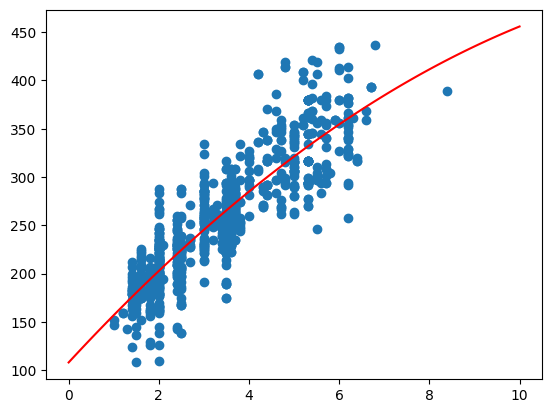

In [23]:
# creating new feature sets
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(training[['ENGINESIZE']])
train_y = np.asanyarray(training[['CO2EMISSIONS']])

test_x = np.asanyarray(testing[['ENGINESIZE']])
test_y = np.asanyarray(testing[['CO2EMISSIONS']])

polynomial = PolynomialFeatures(degree=2)
train_x_polynomial = polynomial.fit_transform(train_x)

regression = linear_model.LinearRegression()
train_y_ = regression.fit(train_x_polynomial,train_y)

plt.scatter(training.ENGINESIZE, training.CO2EMISSIONS)
# create a range of values for x
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)

# transform x_plot into polynomial form
x_plot_poly = polynomial.fit_transform(x_plot)

# evaluate the polynomial equation for x_plot
y_plot = regression.predict(x_plot_poly)

# plot the regression curve
plt.plot(x_plot, y_plot, '-r')




In [ ]:
# evaluating the model
from sklearn.metrics import r2_score
test_x_ = polynomial.fit_transform(test_x)
test_y_ = regression.predict(test_x_)
print('r2 score:', r2_score(test_y, test_y_))